In [1]:
from tpot import TPOTClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics
import scikitplot as skplt

In [2]:
acidoCEST_ML = pd.read_csv('acido_CEST_MRI_MegaBox_01_to_08_clean.csv')
acidoCEST_ML = acidoCEST_ML.drop(['Unnamed: 0','ApproT1(sec)','Temp','FILE','Conc(mM)','ExpT1(ms)', 'ExpT2(ms)', 'ExpB1(percent)', 'ExpB0(ppm)',
       'ExpB0(Hz)', 'SatPower(uT)', 'SatTime(ms)'], axis = 1)

acidoCEST_ML.head(2)

In [3]:
acidoCEST_ML.columns

Index(['pH', '-12', '-11', '-10', '-9', '-6', '-3', '-2.75', '-2.5', '-2.25',
       '-2', '-1.8', '-1.6', '-1.4', '-1.2', '-1', '-0.8', '-0.6', '-0.4',
       '-0.2', '0', '0.2', '0.4', '0.6', '0.8', '1', '1.2', '1.4', '1.6',
       '1.8', '2', '2.2', '2.4', '2.6', '2.8', '3', '3.2', '3.3', '3.4', '3.5',
       '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2', '4.3', '4.4', '4.5',
       '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2', '6.3', '6.4', '6.5',
       '6.6', '6.8', '7', '7.2', '7.4', '7.6', '7.8', '8', '9', '10', '11',
       '12'],
      dtype='object')

## pH  > 7.0

In [4]:
X_train, X_test, y_train, y_test = train_test_split( acidoCEST_ML.drop('pH',axis=1) , 1*(acidoCEST_ML.pH > 7.0 ), test_size=0.30, random_state=42)

In [5]:
tpot = TPOTClassifier(generations=10, population_size=10, verbosity=2, n_jobs= 3 , cv = 3,
                      template='PCA-Selector-Classifier',early_stop=3,max_time_mins=60
                       ,scoring ='precision_weighted')
tpot.fit(X_train,y_train)

Version 0.11.6.post1 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.



Generation 1 - Current best internal CV score: 0.8406095577533014

Generation 2 - Current best internal CV score: 0.8425766471661399

Generation 3 - Current best internal CV score: 0.8499776592109844

Generation 4 - Current best internal CV score: 0.8499776592109844

Generation 5 - Current best internal CV score: 0.8499776592109844

Generation 6 - Current best internal CV score: 0.8499776592109844

The optimized pipeline was not improved after evaluating 3 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(SelectPercentile(PCA(input_matrix, iterated_power=10, svd_solver=randomized), percentile=29), bootstrap=False, criterion=gini, max_features=0.8500000000000001, min_samples_leaf=3, min_samples_split=17, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=3,
               disable_update_check=False, early_stop=3, generations=10,
               log_file=None, max_eval_time_mins=5, max_time_mins=60,
               memory=None, mutation_rate=0.9, n_jobs=3, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=10,
               random_state=None, scoring='precision_weighted', subsample=1.0,
               template='PCA-Selector-Classifier', use_dask=False, verbosity=2,
               warm_start=False)

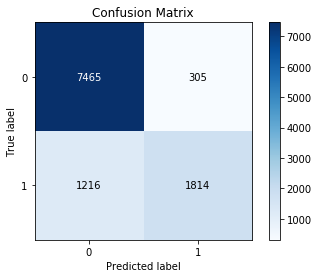

In [6]:
skplt.metrics.plot_confusion_matrix(y_test, tpot.predict(X_test), normalize=False)

In [7]:
print( metrics.classification_report(y_test, tpot.predict(X_test)) )

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7770
           1       0.86      0.60      0.70      3030

    accuracy                           0.86     10800
   macro avg       0.86      0.78      0.81     10800
weighted avg       0.86      0.86      0.85     10800



### Next
- Do we need the data at (power=  0.5 and 1.0 uT, sat time = 0.50 or 1.0 seconds) (heat map of error 2d)
- How much does measuring other things beside the Z spectra help?
- Are the regression outlier due to Power and T1
- Effect of noise

- Do these later
2. Can we start with fewer frequencies ?
3. What frequencies are needed ?
5. Max 27 or 25 frequencies
6. pH higher than 6.8




## pH  > 6.5

In [8]:
X_train, X_test, y_train, y_test = train_test_split( acidoCEST_ML.drop('pH',axis=1) , 1*(acidoCEST_ML.pH > 6.5 ), test_size=0.30, random_state=42)

In [9]:
tpot = TPOTClassifier(generations=10, population_size=10, verbosity=2, n_jobs= 3 , cv = 3,
                      template='PCA-Selector-Classifier',early_stop=3,max_time_mins=60
                       ,scoring ='precision_weighted')
tpot.fit(X_train,y_train)

Version 0.11.6.post1 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.



Generation 1 - Current best internal CV score: 0.7672492909307397

Generation 2 - Current best internal CV score: 0.7672492909307397

Generation 3 - Current best internal CV score: 0.7672492909307397

Generation 4 - Current best internal CV score: 0.7704481803356549

Generation 5 - Current best internal CV score: 0.7743850562598471

Generation 6 - Current best internal CV score: 0.7913650758572618

Generation 7 - Current best internal CV score: 0.814690942925037

Generation 8 - Current best internal CV score: 0.8164871559700232

Generation 9 - Current best internal CV score: 0.8164871559700232

Generation 10 - Current best internal CV score: 0.8164871559700232

Best pipeline: RandomForestClassifier(SelectPercentile(PCA(input_matrix, iterated_power=5, svd_solver=randomized), percentile=48), bootstrap=False, criterion=gini, max_features=0.2, min_samples_leaf=1, min_samples_split=3, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=3,
               disable_update_check=False, early_stop=3, generations=10,
               log_file=None, max_eval_time_mins=5, max_time_mins=60,
               memory=None, mutation_rate=0.9, n_jobs=3, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=10,
               random_state=None, scoring='precision_weighted', subsample=1.0,
               template='PCA-Selector-Classifier', use_dask=False, verbosity=2,
               warm_start=False)

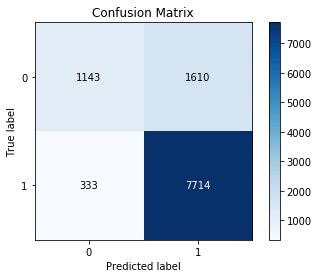

In [10]:
skplt.metrics.plot_confusion_matrix(y_test, tpot.predict(X_test), normalize=False)

In [11]:
print( metrics.classification_report(y_train, tpot.predict(X_train)) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6247
           1       1.00      1.00      1.00     18953

    accuracy                           1.00     25200
   macro avg       1.00      1.00      1.00     25200
weighted avg       1.00      1.00      1.00     25200



In [12]:
tpot.export('acidoCEST_ML_tpot_pH6p5_classifier.py')

In [13]:
acidoCEST_ML.head()

,pH,-12,-11,-10,-9,-6,-3,-2.75,-2.5,-2.25,...,7,7.2,7.4,7.6,7.8,8,9,10,11,12
0,6.24,0.994178,0.983831,0.993102,0.986093,0.981532,0.970109,0.963545,0.965288,0.949342,...,0.971111,0.980716,0.979566,0.979752,0.984350,0.984906,0.984795,0.984350,0.984981,0.988652
1,6.38,0.992924,0.985348,0.994155,0.987194,0.981272,0.965967,0.971658,0.964582,0.963621,...,0.980465,0.974735,0.983810,0.980580,0.989117,0.976427,0.985118,0.992963,0.982541,0.986118
2,6.58,0.994844,0.993349,0.997166,0.991853,0.989137,0.973630,0.973630,0.973788,0.966546,...,0.990908,0.993978,0.986067,0.977566,0.994293,0.991026,0.993073,0.995671,0.995749,0.994293
3,6.69,0.983920,0.990491,0.986394,0.979513,0.977735,0.963471,0.956320,0.960611,0.950174,...,0.977619,0.978972,0.969579,0.976034,0.980634,0.977116,0.982064,0.984422,0.980634,0.978856
4,6.84,0.998284,0.989862,0.989667,0.986353,0.986626,0.968378,0.957851,0.954381,0.955784,...,0.979530,0.976333,0.986626,0.980583,0.986158,0.983624,0.992982,0.984248,0.985690,0.985417


In [14]:
metrics.classification_report( 1*(acidoCEST_ML.pH > 6.5), acidoCEST_ML.drop('pH', axis = 1))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets